In [129]:
from h3 import h3
import numpy as np
import pandas as pd
import sklearn.metrics
import collections

In [130]:
help(np.random.randn)

Help on built-in function randn:

randn(...) method of numpy.random.mtrand.RandomState instance
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `standard_normal`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    .. note::
        New code should use the ``standard_normal`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    If positive int_like arguments are provided, `randn` generates an array
    of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1. A single float randomly sampled
    from the distribution is returned if no argument is provided.
 

In [131]:
randpoints

array([[ -12.71539293,   25.5935722 ],
       [ -37.30492239, -163.51572233],
       [   1.56384715,  -63.72772039],
       ...,
       [ -36.25129481,  -94.60530486],
       [ -25.99274908,  153.91092904],
       [  53.50628973,   -1.16466908]])

In [132]:
randcoords = np.random.randn(1000000, 3)
randpoints = np.zeros((randcoords.shape[0], 2))
randpoints[:, 0] = np.arctan2(randcoords[:,2], np.sqrt(randcoords[:,0]**2 + randcoords[:,1]**2)) * 180/np.pi
randpoints[:, 1] = np.arctan2(randcoords[:,1], randcoords[:,0]) * 180/np.pi
basecells_arr = [
    h3.geo_to_h3(x[0], x[1], 0)
    for x in randpoints
]
len(set(basecells_arr))

122

In [133]:
def lat_lng_to_array(coords):
    deg_to_rad = np.pi / 180
    return np.array([
        np.cos(coords[0] * deg_to_rad) * np.cos(coords[1] * deg_to_rad),
        np.cos(coords[0] * deg_to_rad) * np.sin(coords[1] * deg_to_rad),
        np.sin(coords[0] * deg_to_rad)
    ])

In [134]:
df_base = pd.DataFrame(sorted(set(basecells_arr)))
df_base.columns = ['id']
df_base['coordinates'] = df_base['id'].apply(lambda x: h3.h3_to_geo(x))
df_base['boundary'] = df_base['id'].apply(lambda x: h3.h3_to_geo_boundary(x))
df_base['array_center'] = df_base['coordinates'].apply(lat_lng_to_array)
df_base['array_boundaries'] = df_base['boundary'].apply(lambda ls: [lat_lng_to_array(x) for x in ls])

In [135]:
df_base

,id,coordinates,boundary,array_center,array_boundaries
0,8001fffffffffff,"(79.24239850975904, 38.02340700796989)","((68.92995788193983, 31.831280499087402), (69....","[0.14703869754820312, 0.1149759883838538, 0.98...","[[0.30544055810347437, 0.18961210830239347, 0...."
1,8003fffffffffff,"(79.220986356276, -107.42920224303745)","((87.36469532319619, 145.5581976913369), (76.1...","[-0.05601801132709355, -0.1784349382283302, 0....","[[-0.03791854196698824, 0.026004023022039743, ..."
2,8005fffffffffff,"(74.92843438917433, 145.35624192277984)","((76.163042830191, 94.14309010184775), (66.203...","[-0.21392348345014206, 0.14781718295507032, 0....","[[-0.01727871378473626, 0.23853482399982026, 0..."
3,8007fffffffffff,"(69.66345294982115, -30.968044606549025)","((73.31022368544396, 0.3256103519432223), (81....","[0.2979944168415081, -0.17882698246659262, 0.9...","[[0.28718496677858113, 0.0016320819018338529, ..."
4,8009fffffffffff,"(64.70000012793487, 10.53619907546767)","((63.09505407752544, -10.444977544778336), (55...","[0.42015242670871017, 0.07814524940278324, 0.9...","[[0.44501332647714237, -0.0820363869648118, 0...."
...,...,...,...,...,...
117,80ebfffffffffff,"(-64.7000001279349, -169.46380092453236)","((-58.40154487035269, -154.91727767329215), (-...","[-0.4201524267087098, -0.07814524940278292, -0...","[[-0.4745514937255474, -0.22212168495739576, -..."
118,80edfffffffffff,"(-69.66345294982114, 149.03195539345097)","((-63.09505407752546, 169.55502245522166), (-5...","[-0.2979944168415083, 0.17882698246659284, -0....","[[-0.445013326477142, 0.08203638696481172, -0...."
119,80effffffffffff,"(-74.92843438917433, -34.64375807722018)","((-87.36469532319619, -34.441802308663334), (-...","[0.21392348345014203, -0.14781718295507038, -0...","[[0.03791854196698814, -0.026004023022039885, ..."
120,80f1fffffffffff,"(-79.220986356276, 72.57079775696259)","((-81.27137179020501, 145.24158201971537), (-7...","[0.056018011327093414, 0.17843493822833026, -0...","[[-0.12467608176339194, 0.08651801122940947, -..."


In [136]:
centers = np.concatenate([x.reshape(-1, 1) for x in df_base['array_center'].values], axis=1).T
type(centers), centers.shape

(numpy.ndarray, (122, 3))

In [137]:
distance_faces = sklearn.metrics.pairwise.linear_kernel(centers)
distance_sorted = distance_faces.round(5).copy()
distance_sorted.sort(axis=1)
distance_sorted = distance_sorted[:, -7:]

In [138]:
ct = collections.Counter([tuple(x) for x in distance_sorted])
ct

Counter({(0.93417, 0.93634, 0.93634, 0.94444, 0.94444, 0.95896, 1.0): 60,
         (0.93417, 0.93417, 0.93634, 0.93634, 0.93634, 0.93634, 1.0): 30,
         (0.93417, 0.93417, 0.93417, 0.93417, 0.93417, 0.93417, 1.0): 20,
         (0.85065, 0.95896, 0.95896, 0.95896, 0.95896, 0.95896, 1.0): 12})

In [139]:
dict_types = {
    12: 'vertice',
    20: 'center_face',
    60: 'single_face',
    30: 'divided_faces'
}
face_types = [
    dict_types[dict(ct)[tuple(x)]] for x in distance_sorted
]
collections.Counter(face_types)

Counter({'single_face': 60,
         'divided_faces': 30,
         'center_face': 20,
         'vertice': 12})

In [140]:
df_base['face_type'] = face_types

In [141]:
df_base

,id,coordinates,boundary,array_center,array_boundaries,face_type
0,8001fffffffffff,"(79.24239850975904, 38.02340700796989)","((68.92995788193983, 31.831280499087402), (69....","[0.14703869754820312, 0.1149759883838538, 0.98...","[[0.30544055810347437, 0.18961210830239347, 0....",single_face
1,8003fffffffffff,"(79.220986356276, -107.42920224303745)","((87.36469532319619, 145.5581976913369), (76.1...","[-0.05601801132709355, -0.1784349382283302, 0....","[[-0.03791854196698824, 0.026004023022039743, ...",divided_faces
2,8005fffffffffff,"(74.92843438917433, 145.35624192277984)","((76.163042830191, 94.14309010184775), (66.203...","[-0.21392348345014206, 0.14781718295507032, 0....","[[-0.01727871378473626, 0.23853482399982026, 0...",center_face
3,8007fffffffffff,"(69.66345294982115, -30.968044606549025)","((73.31022368544396, 0.3256103519432223), (81....","[0.2979944168415081, -0.17882698246659262, 0.9...","[[0.28718496677858113, 0.0016320819018338529, ...",single_face
4,8009fffffffffff,"(64.70000012793487, 10.53619907546767)","((63.09505407752544, -10.444977544778336), (55...","[0.42015242670871017, 0.07814524940278324, 0.9...","[[0.44501332647714237, -0.0820363869648118, 0....",vertice
...,...,...,...,...,...,...
117,80ebfffffffffff,"(-64.7000001279349, -169.46380092453236)","((-58.40154487035269, -154.91727767329215), (-...","[-0.4201524267087098, -0.07814524940278292, -0...","[[-0.4745514937255474, -0.22212168495739576, -...",vertice
118,80edfffffffffff,"(-69.66345294982114, 149.03195539345097)","((-63.09505407752546, 169.55502245522166), (-5...","[-0.2979944168415083, 0.17882698246659284, -0....","[[-0.445013326477142, 0.08203638696481172, -0....",single_face
119,80effffffffffff,"(-74.92843438917433, -34.64375807722018)","((-87.36469532319619, -34.441802308663334), (-...","[0.21392348345014203, -0.14781718295507038, -0...","[[0.03791854196698814, -0.026004023022039885, ...",center_face
120,80f1fffffffffff,"(-79.220986356276, 72.57079775696259)","((-81.27137179020501, 145.24158201971537), (-7...","[0.056018011327093414, 0.17843493822833026, -0...","[[-0.12467608176339194, 0.08651801122940947, -...",divided_faces


In [142]:
reference_points = np.concatenate(
    (
        [x.reshape(-1, 1) for x in df_base[df_base['face_type']=='vertice']['array_center'].values]
        + [x.reshape(-1, 1) for x in df_base[df_base['face_type']=='center_face']['array_center'].values]
    ), axis=1).T
type(reference_points), reference_points.shape

(numpy.ndarray, (32, 3))

In [143]:
df_randpoints = pd.DataFrame(randpoints)
df_randpoints.columns = ['latitude', 'longitude']

In [144]:
def bit_structure(cell_str):
    as_binary = bin(int(cell_str, base=16))[2:].zfill(64)
    start = as_binary[:-52]
    base = as_binary[-52:-45]
    rest = as_binary[-45:]

    return start, base, rest

In [145]:
df_randpoints['cell_id_r15'] = df_randpoints.apply(
    lambda row: h3.geo_to_h3(row['latitude'], row['longitude'], 15), axis=1
)
df_randpoints['cell_id_r00'] = df_randpoints.apply(
    lambda row: h3.geo_to_h3(row['latitude'], row['longitude'], 0), axis=1
)

In [146]:
df_randpoints['bit_structure_r15'] = df_randpoints['cell_id_r15'].apply(bit_structure)
df_randpoints['bit_structure_r00'] = df_randpoints['cell_id_r00'].apply(bit_structure)

In [147]:
check = df_randpoints['bit_structure_r15'].apply(lambda x: x[1]) == df_randpoints['bit_structure_r00'].apply(lambda x: x[1])
check.value_counts(normalize=True)

True     0.935057
False    0.064943
dtype: float64

In [151]:
face_types_mapper = {
    bit_structure(row['id'])[1]: row['face_type']
    for _, row in df_base.iterrows()
}

In [152]:
df_randpoints['face_type_r00'] = df_randpoints['bit_structure_r00'].apply(lambda v: face_types_mapper[v[1]])
df_randpoints['face_type_r15'] = df_randpoints['bit_structure_r15'].apply(lambda v: face_types_mapper[v[1]])


In [157]:
a = pd.pivot_table(
    df_randpoints.assign(count=1),
    index=['face_type_r00'],
    columns=['face_type_r15'],
    values='count',
    aggfunc='sum',
    fill_value=0,
)
a

face_type_r15,center_face,divided_faces,single_face,vertice
face_type_r00,,,,
center_face,182867,6303,6220,0
divided_faces,6144,243806,11088,0
single_face,6192,11215,461918,4291
vertice,0,0,4187,55769


In [160]:
fractions = ((a / a.sum().sum())*100)

In [162]:
fractions.round(2)

face_type_r15,center_face,divided_faces,single_face,vertice
face_type_r00,,,,
center_face,18.29,0.63,0.62,0.00
divided_faces,0.61,24.38,1.11,0.00
single_face,0.62,1.12,46.19,0.43
vertice,0.00,0.00,0.42,5.58


In [163]:
fractions.sum(axis=1).round(2)

face_type_r00
center_face      19.54
divided_faces    26.10
single_face      48.36
vertice           6.00
dtype: float64

In [164]:
fractions.sum(axis=0).round(2)

face_type_r15
center_face      19.52
divided_faces    26.13
single_face      48.34
vertice           6.01
dtype: float64

In [167]:
df_randpoints['cell_hierarchy_index_r00'] = df_randpoints['bit_structure_r00'].apply(
    lambda x: [int(x[2][3*i:3*(i+1)], base=2) for i in range(15)]
)
df_randpoints['cell_hierarchy_index_r15'] = df_randpoints['bit_structure_r15'].apply(
    lambda x: [int(x[2][3*i:3*(i+1)], base=2) for i in range(15)]
)

In [168]:
df_randpoints

,latitude,longitude,cell_id_r15,cell_id_r00,bit_structure_r15,bit_structure_r00,face_type_r00,face_type_r15,cell_hierarchy_index_r00,cell_hierarchy_index_r15
0,38.155866,-90.313939,8f26404dc281870,8027fffffffffff,"(000010001111, 0010011, 0010000000100110111000...","(000010000000, 0010011, 1111111111111111111111...",divided_faces,divided_faces,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[1, 0, 0, 2, 3, 3, 4, 1, 2, 0, 1, 4, 1, 6, 0]"
1,42.092960,1.415996,8f39626c1c72196,8039fffffffffff,"(000010001111, 0011100, 1011000100110110000011...","(000010000000, 0011100, 1111111111111111111111...",divided_faces,divided_faces,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[5, 4, 2, 3, 3, 0, 1, 6, 1, 6, 2, 0, 6, 2, 6]"
2,11.003787,-78.400307,8f6789915af5a2d,8067fffffffffff,"(000010001111, 0110011, 1100010011001000101011...","(000010000000, 0110011, 1111111111111111111111...",single_face,single_face,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[6, 1, 1, 4, 4, 2, 5, 5, 3, 6, 5, 5, 0, 5, 5]"
3,45.393235,-2.041894,8f184c50c3b60b6,8019fffffffffff,"(000010001111, 0001100, 0010011000101000011000...","(000010000000, 0001100, 1111111111111111111111...",single_face,single_face,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[1, 1, 4, 2, 4, 1, 4, 1, 6, 6, 6, 0, 2, 6, 6]"
4,-23.640898,-13.011441,8fc1266056f1572,80c1fffffffffff,"(000010001111, 1100000, 1001001100110000001010...","(000010000000, 1100000, 1111111111111111111111...",center_face,center_face,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[4, 4, 6, 3, 0, 0, 5, 3, 3, 6, 1, 2, 5, 6, 2]"
...,...,...,...,...,...,...,...,...,...,...
999995,-23.376852,33.373994,8f97200cc024c1c,8097fffffffffff,"(000010001111, 1001011, 1001000000000110011000...","(000010000000, 1001011, 1111111111111111111111...",center_face,center_face,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[4, 4, 0, 0, 3, 1, 4, 0, 0, 4, 4, 6, 0, 3, 4]"
999996,-11.223385,142.902311,8f9cf58722f5899,809dfffffffffff,"(000010001111, 1001110, 0111101011000011100100...","(000010000000, 1001110, 1111111111111111111111...",divided_faces,divided_faces,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[3, 6, 5, 4, 1, 6, 2, 1, 3, 6, 5, 4, 2, 3, 1]"
999997,5.514285,64.054196,8f62ce6ed66828d,8063fffffffffff,"(000010001111, 0110001, 0110011100110111011010...","(000010000000, 0110001, 1111111111111111111111...",vertice,vertice,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[3, 1, 6, 3, 3, 5, 5, 3, 1, 5, 0, 1, 2, 1, 5]"
999998,17.654533,144.184006,8f4e63009c29386,804ffffffffffff,"(000010001111, 0100111, 0011000110000000010011...","(000010000000, 0100111, 1111111111111111111111...",divided_faces,divided_faces,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[1, 4, 3, 0, 0, 1, 1, 6, 0, 5, 1, 1, 6, 0, 6]"


In [182]:
pattern_ = sklearn.metrics.pairwise.linear_kernel(
    lat_lng_to_array((df_randpoints['latitude'], df_randpoints['longitude'])).T,
    reference_points
)
pattern_.shape

(1000000, 32)

In [183]:
pattern_sorted = pattern_[:, :12].copy()
pattern_sorted.sort(axis=1)

In [187]:
pattern_sorted[0]

array([-0.91029342, -0.77635192, -0.54711685, -0.4952873 , -0.12437716,
       -0.09234474,  0.09234474,  0.12437716,  0.4952873 ,  0.54711685,
        0.77635192,  0.91029342])

In [201]:
df_randpoints.drop([x for x in df_randpoints.columns if x.startswith('features')], axis=1, inplace=True)

In [202]:
for i in range(1, 4):
    df_randpoints[f'features_{i}'] = [x[-i] for x in pattern_sorted]
df_randpoints['class_'] = df_randpoints.apply(
    lambda row: (
        row['bit_structure_r15'][1] == row['bit_structure_r00'][1],
        row['face_type_r00'],
        row['face_type_r00'],
    ),
    axis=1
)

In [203]:
df_randpoints.filter(regex='features_|class_')

,class_,features_1,features_2,features_3
0,"(True, divided_faces, divided_faces)",0.910293,0.776352,0.547117
1,"(True, divided_faces, divided_faces)",0.919154,0.763366,0.521762
2,"(True, single_face, single_face)",0.958157,0.666295,0.592220
3,"(True, single_face, single_face)",0.936559,0.729157,0.557159
4,"(True, center_face, center_face)",0.890844,0.758323,0.688994
...,...,...,...,...
999995,"(True, center_face, center_face)",0.892277,0.747608,0.700668
999996,"(True, divided_faces, divided_faces)",0.855732,0.840309,0.589771
999997,"(True, vertice, vertice)",0.991117,0.561450,0.492410
999998,"(True, divided_faces, divided_faces)",0.877478,0.807615,0.623327


In [204]:
df_randpoints['class_'].value_counts(normalize=True)

(True, single_face, single_face)         0.452615
(True, divided_faces, divided_faces)     0.243806
(True, center_face, center_face)         0.182867
(True, vertice, vertice)                 0.055769
(False, single_face, single_face)        0.031001
(False, divided_faces, divided_faces)    0.017232
(False, center_face, center_face)        0.012523
(False, vertice, vertice)                0.004187
Name: class_, dtype: float64

In [216]:
df_randpoints

,latitude,longitude,cell_id_r15,cell_id_r00,bit_structure_r15,bit_structure_r00,face_type_r00,face_type_r15,cell_hierarchy_index_r00,cell_hierarchy_index_r15,class_,features_1,features_2,features_3
0,38.155866,-90.313939,8f26404dc281870,8027fffffffffff,"(000010001111, 0010011, 0010000000100110111000...","(000010000000, 0010011, 1111111111111111111111...",divided_faces,divided_faces,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[1, 0, 0, 2, 3, 3, 4, 1, 2, 0, 1, 4, 1, 6, 0]","(True, divided_faces, divided_faces)",0.910293,0.776352,0.547117
1,42.092960,1.415996,8f39626c1c72196,8039fffffffffff,"(000010001111, 0011100, 1011000100110110000011...","(000010000000, 0011100, 1111111111111111111111...",divided_faces,divided_faces,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[5, 4, 2, 3, 3, 0, 1, 6, 1, 6, 2, 0, 6, 2, 6]","(True, divided_faces, divided_faces)",0.919154,0.763366,0.521762
2,11.003787,-78.400307,8f6789915af5a2d,8067fffffffffff,"(000010001111, 0110011, 1100010011001000101011...","(000010000000, 0110011, 1111111111111111111111...",single_face,single_face,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[6, 1, 1, 4, 4, 2, 5, 5, 3, 6, 5, 5, 0, 5, 5]","(True, single_face, single_face)",0.958157,0.666295,0.592220
3,45.393235,-2.041894,8f184c50c3b60b6,8019fffffffffff,"(000010001111, 0001100, 0010011000101000011000...","(000010000000, 0001100, 1111111111111111111111...",single_face,single_face,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[1, 1, 4, 2, 4, 1, 4, 1, 6, 6, 6, 0, 2, 6, 6]","(True, single_face, single_face)",0.936559,0.729157,0.557159
4,-23.640898,-13.011441,8fc1266056f1572,80c1fffffffffff,"(000010001111, 1100000, 1001001100110000001010...","(000010000000, 1100000, 1111111111111111111111...",center_face,center_face,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[4, 4, 6, 3, 0, 0, 5, 3, 3, 6, 1, 2, 5, 6, 2]","(True, center_face, center_face)",0.890844,0.758323,0.688994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,-23.376852,33.373994,8f97200cc024c1c,8097fffffffffff,"(000010001111, 1001011, 1001000000000110011000...","(000010000000, 1001011, 1111111111111111111111...",center_face,center_face,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[4, 4, 0, 0, 3, 1, 4, 0, 0, 4, 4, 6, 0, 3, 4]","(True, center_face, center_face)",0.892277,0.747608,0.700668
999996,-11.223385,142.902311,8f9cf58722f5899,809dfffffffffff,"(000010001111, 1001110, 0111101011000011100100...","(000010000000, 1001110, 1111111111111111111111...",divided_faces,divided_faces,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[3, 6, 5, 4, 1, 6, 2, 1, 3, 6, 5, 4, 2, 3, 1]","(True, divided_faces, divided_faces)",0.855732,0.840309,0.589771
999997,5.514285,64.054196,8f62ce6ed66828d,8063fffffffffff,"(000010001111, 0110001, 0110011100110111011010...","(000010000000, 0110001, 1111111111111111111111...",vertice,vertice,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[3, 1, 6, 3, 3, 5, 5, 3, 1, 5, 0, 1, 2, 1, 5]","(True, vertice, vertice)",0.991117,0.561450,0.492410
999998,17.654533,144.184006,8f4e63009c29386,804ffffffffffff,"(000010001111, 0100111, 0011000110000000010011...","(000010000000, 0100111, 1111111111111111111111...",divided_faces,divided_faces,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[1, 4, 3, 0, 0, 1, 1, 6, 0, 5, 1, 1, 6, 0, 6]","(True, divided_faces, divided_faces)",0.877478,0.807615,0.623327


In [218]:
{
    x: ['mean', 'std', 'min', 'max'] for x in df_randpoints.columns if x.startswith('features_')
}

{'features_1': ['mean', 'std', 'min', 'max'],
 'features_2': ['mean', 'std', 'min', 'max'],
 'features_3': ['mean', 'std', 'min', 'max']}

In [219]:
desc = df_randpoints.filter(regex='features_|class_').groupby('class_').agg({
    x: ['mean', 'std', 'min', 'max'] for x in df_randpoints.columns if x.startswith('features_')
})

In [220]:
desc

features_1                      \
                                            mean       std       min   
class_                                                                 
(False, center_face, center_face)       0.873955  0.015586  0.838098   
(False, divided_faces, divided_faces)   0.896142  0.026880  0.837809   
(False, single_face, single_face)       0.939626  0.033371  0.889252   
(False, vertice, vertice)               0.991389  0.001134  0.986799   
(True, center_face, center_face)        0.851823  0.022595  0.794871   
(True, divided_faces, divided_faces)    0.884489  0.022879  0.837566   
(True, single_face, single_face)        0.948406  0.025384  0.889318   
(True, vertice, vertice)                0.995126  0.002992  0.986856   

                                                features_2            \
                                            max       mean       std   
class_                                                                 
(False, center_face, center_face)      0.894423   0.781182  0.029861   
(False, divided_faces, divided_faces)  0.939104   0.779419  0.027513   
(False, single_face, single_face)      0.991272   0.694541  0.067744   
(False, vertice, vertice)              0.993385   0.554424  0.009194   
(True, center_face, center_face)       0.894416   0.787254  0.023210   
(True, divided_faces, divided_faces)   0.939150   0.802637  0.027935   
(True, single_face, single_face)       0.991289   0.675720  0.053018   
(True, vertice, vertice)               1.000000   0.523220  0.028581   

                                                          features_3  \
                                            min       max       mean   
class_                                                                 
(False, center_face, center_face)      0.723893  0.836815   0.688265   
(False, divided_faces, divided_faces)  0.727333  0.837270   0.612405   
(False, single_face, single_face)      0.539123  0.775919   0.578361   
(False, vertice, vertice)              0.538344  0.586161   0.510091   
(True, center_face, center_face)       0.723853  0.837366   0.722621   
(True, divided_faces, divided_faces)   0.727242  0.850640   0.586348   
(True, single_face, single_face)       0.538884  0.775875   0.594801   
(True, vertice, vertice)               0.447560  0.585877   0.490403   

                                                                     
                                            std       min       max  
class_                                                               
(False, center_face, center_face)      0.016719  0.662869  0.723425  
(False, divided_faces, divided_faces)  0.043863  0.515449  0.666659  
(False, single_face, single_face)      0.070830  0.486198  0.722748  
(False, vertice, vertice)              0.008945  0.486141  0.537507  
(True, center_face, center_face)       0.030391  0.662944  0.794350  
(True, divided_faces, divided_faces)   0.040124  0.515021  0.666662  
(True, single_face, single_face)       0.054468  0.486244  0.723503  
(True, vertice, vertice)               0.018391  0.447552  0.538284

In [223]:
import sklearn.model_selection

train, test = sklearn.model_selection.train_test_split(df_randpoints.filter(regex='features_|class_'))

In [227]:
model = sklearn.svm.LinearSVR()
model.fit(train[['features_1', 'features_2']], train['features_3'])

/Users/tiagobbatalhao/.virtualenvs/DataScience/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [229]:
pred = model.predict(test[['features_1', 'features_2']])
truth = test['features_3']

In [230]:
pred

array([0.58126522, 0.59874824, 0.55732225, ..., 0.60833366, 0.68269302,
       0.6094845 ])

In [233]:
print(sklearn.metrics.mean_absolute_error(truth, pred))
print(sklearn.metrics.r2_score(truth, pred))

0.03652316950947749
0.6288615400232905


In [235]:
train.iloc[0]

class_        (True, divided_faces, divided_faces)
features_1                                0.882485
features_2                                0.788726
features_3                                0.656492
Name: 985143, dtype: object

In [237]:
dff = train[(abs(train['features_1']-0.882)<1e-3) & (abs(train['features_2']-0.788)<1e-3)]
dff['features_3'].describe()

count    195.000000
mean       0.659894
std        0.002111
min        0.654750
25%        0.658622
50%        0.659932
75%        0.661439
max        0.664410
Name: features_3, dtype: float64

In [292]:
import sklearn.pipeline
model2 = sklearn.pipeline.Pipeline([
    ('polynomial_features', sklearn.preprocessing.PolynomialFeatures(degree=4, include_bias=False)),
    ('linear_regression', sklearn.linear_model.LinearRegression()),
])
model2.fit(train[['features_1', 'features_2']], train['features_3'])

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('linear_regression', LinearRegression())])

In [293]:
pred2 = model2.predict(test[['features_1', 'features_2']])

In [294]:
print(sklearn.metrics.mean_absolute_error(truth, pred2))
print(sklearn.metrics.r2_score(truth, pred2))

0.005243568252888847
0.9923780335212944


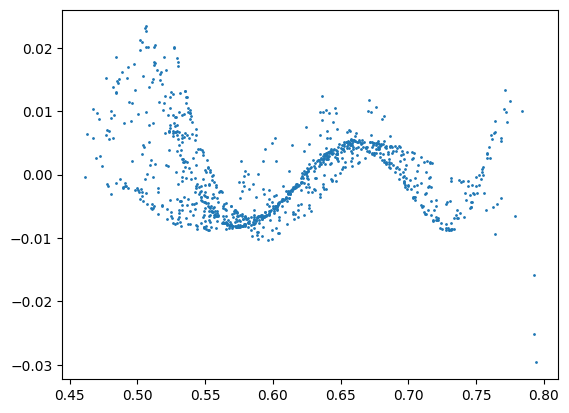

In [295]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plot_df = pd.DataFrame([list(truth), list(pred2)]).T.sample(n=1000)
ax.scatter(plot_df[0], plot_df[1]-plot_df[0], s=1)


In [296]:
vars(model2.named_steps['linear_regression'])

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 14,
 'coef_': array([  82585.40972731,   40171.24532708, -102888.18002785,
         -96101.3910804 ,  -26814.36077913,   57224.01849803,
          77829.35994324,   40557.10173987,    9009.51471704,
         -11995.76369037,  -21122.4868152 ,  -15952.88018778,
          -6216.43961368,   -1324.35246268]),
 'rank_': 14,
 'singular_': array([3.01188107e+02, 7.60587650e+01, 2.21168511e+01, 3.31497891e+00,
        9.77943906e-01, 3.88030402e-01, 1.54304846e-01, 2.93126726e-02,
        1.18669037e-02, 4.67327464e-03, 1.42394277e-03, 6.24843079e-04,
        9.73549956e-05, 1.15477382e-05]),
 'intercept_': -25027.237208205002}

In [291]:
truth

341600    0.543858
279997    0.651451
974783    0.545151
158096    0.589606
824671    0.548499
            ...   
142495    0.620799
308051    0.520999
158756    0.563397
923672    0.723262
257368    0.674177
Name: features_3, Length: 250000, dtype: float64

In [255]:
pred2

array([0.54459914, 0.65396205, 0.53747805, ..., 0.55765672, 0.72108554,
       0.67278507])

In [303]:
termA = df_randpoints.filter(regex='features_').sum(axis=1)**2
termB = df_randpoints.filter(regex='features_').applymap(lambda x: x**2).sum(axis=1)

In [311]:
_fit = np.concatenate([x.values.reshape(-1, 1) for x in [termA, termB]], axis=1)
print(_fit.shape)
pca = sklearn.decomposition.PCA().fit(_fit)
print(pca.explained_variance_.round(12))

(1000000, 2)
[0.19423182 0.        ]


In [316]:
xi_ = pca.components_[-1]

In [319]:
sinsq = (xi_[1] - xi_[0]) / (3* (xi_[1] + xi_[0]))
sinsq
angle = np.arcsin(np.sqrt(sinsq)) * 180/np.pi
angle, 90-angle

(47.25661606178863, 42.74338393821137)

In [322]:
lin_ = sklearn.metrics.pairwise.linear_kernel(reference_points[:12])
lin_

array([[ 1.       ,  0.4472136,  0.4472136,  0.4472136,  0.4472136,
         0.4472136, -0.4472136, -0.4472136, -0.4472136, -0.4472136,
        -0.4472136, -1.       ],
       [ 0.4472136,  1.       ,  0.4472136,  0.4472136, -0.4472136,
        -0.4472136,  0.4472136,  0.4472136, -0.4472136, -0.4472136,
        -1.       , -0.4472136],
       [ 0.4472136,  0.4472136,  1.       , -0.4472136,  0.4472136,
        -0.4472136,  0.4472136, -0.4472136,  0.4472136, -1.       ,
        -0.4472136, -0.4472136],
       [ 0.4472136,  0.4472136, -0.4472136,  1.       , -0.4472136,
         0.4472136, -0.4472136,  0.4472136, -1.       ,  0.4472136,
        -0.4472136, -0.4472136],
       [ 0.4472136, -0.4472136,  0.4472136, -0.4472136,  1.       ,
         0.4472136, -0.4472136, -1.       ,  0.4472136, -0.4472136,
         0.4472136, -0.4472136],
       [ 0.4472136, -0.4472136, -0.4472136,  0.4472136,  0.4472136,
         1.       , -1.       , -0.4472136, -0.4472136,  0.4472136,
         0.4472136,

In [328]:
c = np.sqrt((1-lin_[0,1])*(2/3))
ang = np.arccos(c) * 180 / np.pi
ang

52.62263185935029

In [333]:
xi0 = 1 - 3*np.sin(np.arccos(c))**2
xi1 = 1 + 3*np.sin(np.arccos(c))**2
termA = df_randpoints.filter(regex='features_').sum(axis=1)**2
termB = df_randpoints.filter(regex='features_').applymap(lambda x: x**2).sum(axis=1)
term = xi0 * termA + xi1 * termB
term.std()

0.09056621649977636

In [332]:
angle = np.arcsin(np.sqrt(sinsq))

xi0 = 1 - 3*np.sin(angle)**2
xi1 = 1 + 3*np.sin(angle)**2
termA = df_randpoints.filter(regex='features_').sum(axis=1)**2
termB = df_randpoints.filter(regex='features_').applymap(lambda x: x**2).sum(axis=1)
term = xi0 * termA + xi1 * termB
term.std()

7.444189801983409e-15

In [354]:
def func_optimize(b, c, params):
    insqrt = np.sqrt(1 + params[4] * (b+c)**2 + params[5] * (b-c)**2)
    return params[0] + params[1] * b + params[2] * c + params[3] * insqrt

In [355]:
func_error = lambda p, a,b,c: sum([(func_optimize(y,x,p)-z)**2 for x,y,z in zip(a,b,c) ])

In [356]:
feat = df_randpoints[['features_1', 'features_2', 'features_3']].values
a = lambda p: func_error(p, feat[:,0], feat[:,1], feat[:,2])
a((0,1,1,0,0,0))

1060140.547093964

In [357]:
import scipy.optimize
feat = df_randpoints[['features_1', 'features_2', 'features_3']].values
opt = scipy.optimize.fmin(
    lambda p: func_error(p, feat[:,0], feat[:,1], feat[:,2]),
    x0=(0,1,1,0,0,0)
)

Optimization terminated successfully.
         Current function value: 4254.448017
         Iterations: 162
         Function evaluations: 287


In [360]:
opt

array([ 2.20231975e-03,  6.30750912e-01,  1.65344973e-01,  1.29385860e-03,
        2.72059227e-04, -2.07363168e-04])

In [361]:
termA = df_randpoints.filter(regex='features_').sum(axis=1)**2
termB = df_randpoints.filter(regex='features_').applymap(lambda x: x**2).sum(axis=1)

In [363]:
df_randpoints.filter(regex='features_')

,features_1,features_2,features_3
0,0.910293,0.776352,0.547117
1,0.919154,0.763366,0.521762
2,0.958157,0.666295,0.592220
3,0.936559,0.729157,0.557159
4,0.890844,0.758323,0.688994
...,...,...,...
999995,0.892277,0.747608,0.700668
999996,0.855732,0.840309,0.589771
999997,0.991117,0.561450,0.492410
999998,0.877478,0.807615,0.623327
